In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

OAI = pd.read_csv("OnlineActionInfo.csv")
TFI = pd.read_csv("TransferInfo.csv")
CTI = pd.read_csv("CustomerInfo.csv")
PDI = pd.read_csv("ProductInfo.csv")

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
print(OAI.shape)
print(OAI.info())
print(TFI.shape)
print(TFI.info())
print(CTI.shape)
print(CTI.info())
print(PDI.shape)
print(PDI.info())
OAI["trfc_src"]!=.value_counts()

(3196362, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196362 entries, 0 to 3196361
Data columns (total 14 columns):
clnt_id            int32
sess_id            int16
hit_seq            int16
action_type        int16
biz_unit           object
sess_dt            datetime64[ns]
hit_tm             object
hit_pss_tm         int32
trans_id           int32
sech_kwd           object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src           object
dvc_ctg_nm         object
dtypes: datetime64[ns](1), float64(2), int16(3), int32(3), object(5)
memory usage: 250.0+ MB
None
(599961, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599961 entries, 0 to 599960
Data columns (total 9 columns):
clnt_id      599961 non-null int32
trans_id     599961 non-null int32
trans_seq    599961 non-null int16
biz_unit     599961 non-null object
pd_c         599961 non-null object
de_dt        599961 non-null datetime64[ns]
de_tm        599961 non-null object
buy_am       599961 non-null

DIRECT      1715541
unknown      826946
PUSH         523300
WEBSITE       49472
PORTAL_1      40669
PORTAL_2      30642
PORTAL_3       9792
Name: trfc_src, dtype: int64

In [9]:
OAI[["trans_id","sech_kwd",'tot_pag_view_ct','tot_sess_hr_v']] = OAI[["trans_id","sech_kwd","tot_pag_view_ct",'tot_sess_hr_v']].fillna(0)
OAI[['sess_id','hit_seq','action_type']] = OAI[['sess_id','hit_seq','action_type']].astype(np.int16)
OAI[['hit_pss_tm','clnt_id','trans_id']] = OAI[['hit_pss_tm','clnt_id','trans_id']].astype(np.int32)
OAI['sess_dt'] = pd.to_datetime(OAI['sess_dt'], format='%Y%m%d')
OAI.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,2019-09-13,01:16,2571103,0,0,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,2019-09-13,01:14,2485909,0,0,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,2019-09-13,01:17,2646597,0,0,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,2019-09-13,00:46,788304,0,0,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,2019-09-13,01:17,2617609,0,0,34.0,2663.0,DIRECT,NaN


In [4]:
TFI[['trans_seq','buy_ct']] = TFI[['trans_seq','buy_ct']].astype(np.int16)
TFI[['clnt_id','trans_id']] = TFI[['clnt_id','trans_id']].astype(np.int32)
TFI['de_dt'] = pd.to_datetime(TFI['de_dt'], format='%Y%m%d')
CTI['clnt_id'] = CTI['clnt_id'].astype(np.int32)
PDI["clac_nm3"] = PDI["clac_nm3"].fillna("")
TFI.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,2019-09-20,12:41,5990,1
1,21279,104907,4,A03,unknown,2019-09-20,10:27,10900,1
2,39423,105124,11,A03,unknown,2019-09-20,17:26,12900,1
3,18362,104010,1,A03,unknown,2019-09-20,09:57,9900,1
4,39423,105124,13,A03,0565,2019-09-20,17:26,2990,1


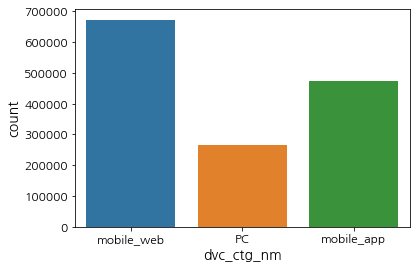

In [5]:
OAI
data = OAI[OAI["dvc_ctg_nm"].notnull()]["dvc_ctg_nm"]
#OAI[""]
sns.countplot(data)

In [38]:
#sns.distplot(OAI["tot_sess_hr_v"])
OAI.set_index('action_type').groupby(level=0).aggregate([np.mean,np.max])[["tot_pag_view_ct","tot_sess_hr_v"]]

tot_pag_view_ct        tot_sess_hr_v         
                       mean   amax          mean     amax
action_type                                              
0                 59.922414  464.0   1569.996767  27635.0
1                 43.393311  399.0   1674.360106  24493.0
2                 32.538163  456.0   1328.011295  24493.0
3                 43.327559  399.0   1780.419376  24493.0
4                 47.527676  399.0   1800.849083  19363.0
5                 47.438101  399.0   1759.417545  24493.0
6                 45.887696  426.0   1441.096944  24493.0
7                 29.867865  297.0   1011.379316  11171.0

In [43]:
OAI[((OAI["action_type"]==0)|(OAI["action_type"]==6))& ((OAI["sech_kwd"]==0)&(OAI["trans_id"]==0))]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
2660,25279,35,44,6,A03,2019-09-26,23:43,2711601,0,0,53.0,2866.0,DIRECT,NaN
2685,25279,21,70,6,A03,2019-09-07,13:40,5107935,0,0,105.0,5113.0,DIRECT,NaN
2691,25279,33,15,6,A03,2019-09-21,23:23,624552,0,0,23.0,689.0,DIRECT,NaN
2692,25279,33,16,6,A03,2019-09-21,23:24,671005,0,0,23.0,689.0,DIRECT,NaN
2902,46677,16,37,6,A03,2019-07-31,16:48,869953,0,0,45.0,922.0,DIRECT,NaN
2970,46677,16,40,6,A03,2019-07-31,16:48,879759,0,0,45.0,922.0,DIRECT,NaN
3217,46677,16,34,6,A03,2019-07-31,16:48,852817,0,0,45.0,922.0,DIRECT,NaN
3332,46677,16,43,6,A03,2019-07-31,16:49,922466,0,0,45.0,922.0,DIRECT,NaN
3895,1304,13,32,6,A03,2019-08-18,22:33,422047,0,0,27.0,422.0,DIRECT,NaN
4105,39126,8,53,6,A03,2019-08-21,13:02,2281958,0,0,40.0,2282.0,DIRECT,NaN


In [51]:
merge1 = pd.DataFrame(OAI.merge(CTI,how = "inner", on="clnt_id" ))
data = merge1[merge1["clnt_gender"]!="unknown"]
data

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
100,28304,1,3,3,A03,20190716,11:29,501434,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
101,28304,1,12,5,A03,20190716,11:35,822660,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
102,28304,1,17,3,A03,20190716,11:37,990056,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
103,28304,1,7,5,A03,20190716,11:32,643327,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
104,28304,1,20,5,A03,20190716,11:39,1087859,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
105,28304,1,2,3,A03,20190716,11:29,494423,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
106,28304,1,1,3,A03,20190716,11:27,356849,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
107,28304,1,14,3,A03,20190716,11:37,943159,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50
108,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,56.0,1303.0,PUSH,mobile_web,F,50
109,28304,1,5,3,A03,20190716,11:30,571922,NaN,NaN,56.0,1303.0,PUSH,mobile_web,F,50


In [41]:
sum(TFI["pd_c"]=="unknown")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
2544724,30605,16,1,0,A03,20190907,22:04,14548,NaN,버터,3.0,39.0,DIRECT,NaN
2544725,30605,12,2,0,A03,20190821,23:36,422952,NaN,카누,5.0,467.0,DIRECT,NaN
2544726,30605,13,1,0,A03,20190822,14:47,0,NaN,카누,1.0,NaN,DIRECT,NaN
2544727,28304,1,13,0,A03,20190716,11:36,933562,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web
2544728,28304,1,11,0,A03,20190716,11:35,820901,NaN,어묵,56.0,1303.0,PUSH,mobile_web
2544729,28304,1,16,0,A03,20190716,11:37,976904,NaN,고메핫도그,56.0,1303.0,PUSH,mobile_web
2544730,28304,1,10,0,A03,20190716,11:34,786138,NaN,핫도그,56.0,1303.0,PUSH,mobile_web
2544731,28304,1,9,0,A03,20190716,11:34,759117,NaN,어묵,56.0,1303.0,PUSH,mobile_web
2544732,28304,1,18,0,A03,20190716,11:38,1015222,NaN,비비고만두,56.0,1303.0,PUSH,mobile_web
2544733,43159,1,2,0,A03,20190830,21:36,118892,NaN,cj,18.0,1248.0,DIRECT,PC


In [61]:
data1 = OAI.merge(TFI,how = "inner", on = "clnt_id")

MemoryError: 

In [55]:
dd = data["sech_kwd"]
d1 = TFI["pd_c"]

(599961,)

In [15]:
pp = oai2.merge(tfi2, how = "inner", on="clnt_id")

In [22]:
pp1 = pp[(pp["hit_seq"]==0)|(pp["hit_seq"]==3)]

In [56]:
pp2 = pp[["sech_kwd","pd_c"]]

In [57]:
pp2

,sech_kwd,pd_c
0,NaN,1568
1,NaN,1583
2,NaN,1625
3,NaN,1394
4,NaN,0515
5,NaN,0515
6,NaN,0516
7,NaN,0379
8,NaN,1568
9,NaN,1583


In [49]:
cti1 = CTI[CTI["clnt_gender"]!="unknown"]
merge2 = OAI.merge(cti1,how = "inner", on="clnt_id")
merge2.head(10)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
0,28304,1,3,3,A03,2019-07-16,11:29,501434,0,0,56.0,1303.0,PUSH,mobile_web,F,50
1,28304,1,12,5,A03,2019-07-16,11:35,822660,0,0,56.0,1303.0,PUSH,mobile_web,F,50
2,28304,1,17,3,A03,2019-07-16,11:37,990056,0,0,56.0,1303.0,PUSH,mobile_web,F,50
3,28304,1,7,5,A03,2019-07-16,11:32,643327,0,0,56.0,1303.0,PUSH,mobile_web,F,50
4,28304,1,20,5,A03,2019-07-16,11:39,1087859,0,0,56.0,1303.0,PUSH,mobile_web,F,50
5,28304,1,2,3,A03,2019-07-16,11:29,494423,0,0,56.0,1303.0,PUSH,mobile_web,F,50
6,28304,1,1,3,A03,2019-07-16,11:27,356849,0,0,56.0,1303.0,PUSH,mobile_web,F,50
7,28304,1,14,3,A03,2019-07-16,11:37,943159,0,0,56.0,1303.0,PUSH,mobile_web,F,50
8,28304,1,22,6,A03,2019-07-16,11:41,1212297,51903,0,56.0,1303.0,PUSH,mobile_web,F,50
9,28304,1,5,3,A03,2019-07-16,11:30,571922,0,0,56.0,1303.0,PUSH,mobile_web,F,50


In [ ]:
data = merge2[merge2["dvc_ctg_nm"].notnull()][["dvc_ctg_nm","clnt_gender"]].groupby("clnt_gender")

In [ ]:
data.sum()